# ADA PROJECT 2 - Dive into the Heart of Chicaco's crime

## Dataset: Food inspection in chicago

### Abstract: 
This dataset records the results of food inspection since 2010 in Chicago. We have access to the name and location of the food institution, the results of the test. We can find areas that tend to fail inspections and see how they compare with the crime rate. It can tell us if crimes are located in areas with good restaurants (might be richer areas) or bad ones (might be poorer areas).

### Notes 

This dataset is available on : https://www.kaggle.com/chicago/chicago-food-inspections

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Data Loading

In [140]:
# Load the data 
FOOD_INSPECTION_PATH = './data/chicago-food-inspections/food-inspections.csv'
food_inspection_data = pd.read_csv(FOOD_INSPECTION_PATH)

In [141]:
food_inspection_data.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,1.959790e+05,1.959620e+05,195929.000000,195286.000000,195286.000000,0.0,0.0,0.0,0.0,0.0
mean,1.445550e+06,1.599125e+06,60628.737813,41.881216,-87.676832,NaN,NaN,NaN,NaN,NaN
std,6.341894e+05,8.961630e+05,122.183684,0.080843,0.058978,NaN,NaN,NaN,NaN,NaN
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428,NaN,NaN,NaN,NaN,NaN
25%,1.150586e+06,1.224170e+06,60614.000000,41.834761,-87.707795,NaN,NaN,NaN,NaN,NaN
50%,1.490878e+06,1.979615e+06,60625.000000,41.891908,-87.666816,NaN,NaN,NaN,NaN,NaN
75%,1.995608e+06,2.240034e+06,60643.000000,41.939812,-87.634955,NaN,NaN,NaN,NaN,NaN
max,2.345702e+06,9.999999e+06,60827.000000,42.021064,-87.525094,NaN,NaN,NaN,NaN,NaN


In [142]:
food_inspection_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2345678,"NEW KNOWLEDGE LEARNING CENTER, INC.","NEW KNOWLEDGE LEARNING CENTER, INC.",2215898.0,Children's Services Facility,Risk 1 (High),8440 S KEDZIE AVE,CHICAGO,IL,60652.0,...,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",41.739458,-87.702257,"{'longitude': '41.73945838739822', 'latitude':...",NaN,NaN,NaN,NaN,NaN
1,2345670,TACOS MONTANAS,TACOS MONTANAS,2684320.0,Restaurant,Risk 1 (High),3254 W LAWRENCE AVE,CHICAGO,IL,60625.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.968541,-87.710704,"{'longitude': '41.96854124925287', 'latitude':...",NaN,NaN,NaN,NaN,NaN
2,2345691,MONGOLIAN CUISINE,MONGOLIAN CUISINE,2689518.0,Restaurant,Risk 1 (High),4640 N CUMBERLAND AVE,CHICAGO,IL,60656.0,...,Not Ready,NaN,41.964212,-87.836837,"{'longitude': '41.96421158016989', 'latitude':...",NaN,NaN,NaN,NaN,NaN
3,2345690,ALCOCER'S LOCAL SHOP,ALCOCER'S LOCAL SHOP,2578896.0,Grocery Store,Risk 1 (High),3413 W 51ST ST,CHICAGO,IL,60632.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.800637,-87.709274,"{'longitude': '41.800636651320424', 'latitude'...",NaN,NaN,NaN,NaN,NaN
4,2345666,GABY'S PANADERIA Y PIZZERIA,PANADERIA Y PIZZERIA LA VILLA,2550529.0,Bakery,Risk 1 (High),5050-5054 W FULLERTON AVE,CHICAGO,IL,60639.0,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.924257,-87.753258,"{'longitude': '41.92425666505584', 'latitude':...",NaN,NaN,NaN,NaN,NaN


## 1. Data Overview

In [143]:
# Look a the dimention of the data : 
food_inspection_data.shape

(195979, 22)

_We can see that our data has 195979 examples with 22 features._

### 1.1. Features description

In [144]:
food_inspection_data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

We found more information about the feature in https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF , where we found the description of each features:

**Features description:**

- **DBA:** ‘Doing business as.’ This is legal name of the establishment.

- **AKA:** ‘Also known as.’ This is the name the public would know the establishment as.

- **License number:** This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.

- **Type of facility:** Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.

- **Risk category of facility:** Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of inspection is tied to this risk, with risk 1 establishments inspected most frequently and risk 3 least frequently.

- **Street address, city, state and zip code of facility:** This is the complete address where the facility is located.

- **Inspection date:** This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.

- **Inspection type:** An inspection can be one of the following types: canvass, the most common type of inspection performed at a frequency relative to the risk of the establishment; consultation, when the inspection is done at the request of the owner prior to the opening of the establishment; complaint, when the inspection is done in response to a complaint against the establishment; license, when the inspection is done as a requirement for the establishment to receive its license to operate; suspect food poisoning, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); task-force inspection, when an inspection of a bar or tavern is done. Re-inspections can occur for most types of these inspections and are indicated as such.

- **Results:** An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15-29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.

- **Violations:** An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 


In the data description file, there is also an interesting disclaimer about the duplicated elements:

**Disclaimer (duplicated data):**

Attempts have been made to minimize any and all duplicate inspection reports.
However, the dataset may still contain such duplicates and the appropriate precautions should
be exercised when viewing or analyzing these data. The result of the inspections (pass, pass
with conditions or fail) as well as the violations noted are based on the findings identified and
reported by the inspector at the time of the inspection, and may not reflect the findings noted at
other times.

### 1.2. Missing Values

In [145]:
# Check which columns contains missing values.
food_inspection_data.isnull().any()

Inspection ID                 False
DBA Name                      False
AKA Name                       True
License #                      True
Facility Type                  True
Risk                           True
Address                       False
City                           True
State                          True
Zip                            True
Inspection Date               False
Inspection Type                True
Results                       False
Violations                     True
Latitude                       True
Longitude                      True
Location                       True
Historical Wards 2003-2015     True
Zip Codes                      True
Community Areas                True
Census Tracts                  True
Wards                          True
dtype: bool

_We can observe that we have missing values for many of our features. We therefore need to clean this up. First of all, we are going to look for the number of missing values as well as if some columns contains only missing values. 

In [146]:
# Count the number of missing values per features.
food_inspection_data.isnull().sum()

Inspection ID                      0
DBA Name                           0
AKA Name                        2453
License #                         17
Facility Type                   4771
Risk                              71
Address                            0
City                             138
State                             42
Zip                               50
Inspection Date                    0
Inspection Type                    1
Results                            0
Violations                     51997
Latitude                         693
Longitude                        693
Location                         693
Historical Wards 2003-2015    195979
Zip Codes                     195979
Community Areas               195979
Census Tracts                 195979
Wards                         195979
dtype: int64

_We can see here that 5 features contains only missing values ('Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', and 'Wards'). We can therefore get rid of them._

In [147]:
# Copy the initial dataset to a new one in order to perform operations
clean_inspection_data = food_inspection_data.copy()

In [148]:
# Select the features that we can to keep: all except the empty one (see above for details).
initial_cols = ['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address', 
               'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results', 'Violations', 
              'Latitude', 'Longitude', 'Location']

In [149]:
clean_inspection_data = clean_inspection_data[initial_cols]

_We can now look deeper into the different features that has some missing values._

### Missing Values - Analysis
Let's think of what we could do in order to replace those values: 

- **Location, Latitude and Longitude:** have the same number of missing values, they might be related.

- **Violations:** has a lot of missing value. Nevertheless, it is possible that if a restaurant pass the inspection with success, the Violations section remains empty.

- **Inspection Type**: has only one missing value. We can simply remove this example from the dataset.

- **Address, City, State, Zip:** those features are going to be related together as well as with the location. We may be able to complete missing values for City, Zip and State based on the Address.

- **Risk:** a few values are missing, let's look deeper into this feature before making any change

- **Facility Type:** a few values are missing, let's look deeper into this feature.

- **Licence #:** this feature is important because it should define uniquely the different restaurants. Only a few are missing. We can delete those examples.

- **DBA and AKA names:** only some AKA name are missing. As AKA name is a surname or other name of a business, we can simply delete features or copy the missing values from DBA to AKA.

- **Inspection date:** this feature does not contain any missing values but could be split into day, month and year if necessary.

In [150]:
clean_inspection_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2345678,"NEW KNOWLEDGE LEARNING CENTER, INC.","NEW KNOWLEDGE LEARNING CENTER, INC.",2215898.0,Children's Services Facility,Risk 1 (High),8440 S KEDZIE AVE,CHICAGO,IL,60652.0,2019-11-15T00:00:00.000,License,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",41.739458,-87.702257,"{'longitude': '41.73945838739822', 'latitude':..."
1,2345670,TACOS MONTANAS,TACOS MONTANAS,2684320.0,Restaurant,Risk 1 (High),3254 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-11-15T00:00:00.000,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.968541,-87.710704,"{'longitude': '41.96854124925287', 'latitude':..."
2,2345691,MONGOLIAN CUISINE,MONGOLIAN CUISINE,2689518.0,Restaurant,Risk 1 (High),4640 N CUMBERLAND AVE,CHICAGO,IL,60656.0,2019-11-15T00:00:00.000,License,Not Ready,NaN,41.964212,-87.836837,"{'longitude': '41.96421158016989', 'latitude':..."
3,2345690,ALCOCER'S LOCAL SHOP,ALCOCER'S LOCAL SHOP,2578896.0,Grocery Store,Risk 1 (High),3413 W 51ST ST,CHICAGO,IL,60632.0,2019-11-15T00:00:00.000,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.800637,-87.709274,"{'longitude': '41.800636651320424', 'latitude'..."
4,2345666,GABY'S PANADERIA Y PIZZERIA,PANADERIA Y PIZZERIA LA VILLA,2550529.0,Bakery,Risk 1 (High),5050-5054 W FULLERTON AVE,CHICAGO,IL,60639.0,2019-11-15T00:00:00.000,Canvass Re-Inspection,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.924257,-87.753258,"{'longitude': '41.92425666505584', 'latitude':..."


#### 1.2.1 Latitude, Longitude and Location

_Let's look at the 'Latitude', 'Longitude', and 'Location' features._

In [151]:
location_data = clean_inspection_data[['Latitude', 'Longitude', 'Location']]
location_data.head()

,Latitude,Longitude,Location
0,41.739458,-87.702257,"{'longitude': '41.73945838739822', 'latitude':..."
1,41.968541,-87.710704,"{'longitude': '41.96854124925287', 'latitude':..."
2,41.964212,-87.836837,"{'longitude': '41.96421158016989', 'latitude':..."
3,41.800637,-87.709274,"{'longitude': '41.800636651320424', 'latitude'..."
4,41.924257,-87.753258,"{'longitude': '41.92425666505584', 'latitude':..."


_We can see that the 'Location' feature is just a combination of 'Latitude' and 'Longitude' and is therefore useless. As they all had the same number of missing values, let's check if the missing values are for the same rows.

In [152]:
null_locations = location_data.isnull()
# Get the shape of rows where all Location, Latitude and Longitude are Nan Values. 
null_locations[(null_locations['Location'] == True)
               &(null_locations['Latitude'] == True)
               &(null_locations['Longitude'] == True)].shape

(693, 3)

**Conclusion:**

We learned from this that the 693 missing values for 'Location', 'Latitude' and 'Longitude are on the same rows. We can therefore first **delete the location feature** that is useless.

#### 1.2.2 Violations

_As mentionned before, it is possible that the missing values of violations corresponds to restaurents that passed the test. We are therefore going to check this hypothesis._

In [153]:
# Create a dataset with only violations and results features
null_violations = clean_inspection_data[['Violations', 'Results']]
null_violations.head()

,Violations,Results
0,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",Pass
1,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass w/ Conditions
2,NaN,Not Ready
3,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,Pass
4,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,Pass


In [154]:
# Counts the number of appearance of a result value for each Violation that is missing.
null_violations[null_violations['Violations'].isnull() == True]['Results'].value_counts()

Pass                    23898
Out of Business         16837
No Entry                 5811
Fail                     3100
Not Ready                1828
Pass w/ Conditions        455
Business Not Located       68
Name: Results, dtype: int64

_We can see here that our assumption was wrong. A missing value for violations does not imply that an inspection has been perfect but are just missing values._

In [155]:
# Look at the rows where the Result is a 'Pass'
null_violations[null_violations['Results'] == 'Pass'].head()

,Violations,Results
0,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",Pass
3,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,Pass
4,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,Pass
5,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass
10,NaN,Pass


_We can also see here that the inverse is also false : having a 'Pass' at the inspection does not imply that the violation feature is null._

**Conclusion:** 

We are a bit embarassed because this Violations feature seems to be important. A first solution could to simply remove the rows that contains those missing values. Also, we can see that the violation feature seems to contain a list of violations all identified with a number. We will therefore be able in the future to clean and transform this feature. 

#### 1.2.3 Inspection type

In [156]:
clean_inspection_data['Inspection Type'].value_counts().head()

Canvass                  103525
License                   25926
Canvass Re-Inspection     20611
Complaint                 18165
License Re-Inspection      8981
Name: Inspection Type, dtype: int64

In [157]:
clean_inspection_data[clean_inspection_data['Inspection Type'].isnull() == True]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
64894,1946612,ARAMARL-FRESHII,FRESHII,2470318.0,Restaurant,Risk 1 (High),2650 N CLARK ST,CHICAGO,IL,60614.0,2016-07-14T00:00:00.000,NaN,Pass,NaN,41.930833,-87.644135,"{'longitude': '41.93083301378749', 'latitude':..."


**Conclusion:**

As we can see, only one row of the inspection feature has a Null value. We will therefore **delete it (row 64894)**.

#### 1.2.4 Address, City, State, Zip

In [158]:
clean_inspection_data[['Address', 'City', 'State', 'Zip']].head()

,Address,City,State,Zip
0,8440 S KEDZIE AVE,CHICAGO,IL,60652.0
1,3254 W LAWRENCE AVE,CHICAGO,IL,60625.0
2,4640 N CUMBERLAND AVE,CHICAGO,IL,60656.0
3,3413 W 51ST ST,CHICAGO,IL,60632.0
4,5050-5054 W FULLERTON AVE,CHICAGO,IL,60639.0


_We as we know that this data come for the City of Chicago. Therefore, we can guess that all the rows for the State should be 'IL' for Illinois. Maybe the city is also chicago._

In [159]:
# Get the number of rows per value of the 'State' feature.
clean_inspection_data['State'].value_counts()

IL    195934
IN         1
WI         1
NY         1
Name: State, dtype: int64

_Only three inspections are not made inside the state (Wisconsin, Indiana and New York). We can therefore remove those useless rows._

_Then, let's look at the city feature:_

In [160]:
# Get the number of rows per value of the 'City' feature
clean_inspection_data['City'].value_counts().head(10)

CHICAGO              195140
Chicago                 321
chicago                  96
CCHICAGO                 46
SCHAUMBURG               25
MAYWOOD                  15
ELK GROVE VILLAGE        13
CHicago                  12
CHESTNUT STREET          11
EVANSTON                 11
Name: City, dtype: int64

_We can see here that most of the data comes from chicago (as expected). We can also see that there as some typos in the city names as Chicaco seems to appear many times. Also, some different cities are also present. As there is just a few, we will simply delete the rows._

_Finally, let's look at the zip feature:_

In [161]:
# Get the different values of Zip. 
clean_inspection_data['Zip'].value_counts().keys()

Float64Index([60614.0, 60647.0, 60657.0, 60622.0, 60611.0, 60618.0, 60608.0,
              60625.0, 60639.0, 60607.0,
              ...
              60438.0, 60440.0, 60453.0, 60458.0, 60464.0, 60477.0, 60478.0,
              60559.0, 60706.0, 53061.0],
             dtype='float64', length=112)

_We checked on internet (https://worldpostalcode.com/united-states/illinois/chicago) what were the zip code associated with the city of chicago. It appear that the zip codes associated with the city of Chicago are : 60601 to 60701._

_Let's now check the addresses:_

In [162]:
clean_inspection_data['Address'].head()

0            8440 S KEDZIE AVE 
1          3254 W LAWRENCE AVE 
2        4640 N CUMBERLAND AVE 
3               3413 W 51ST ST 
4    5050-5054 W FULLERTON AVE 
Name: Address, dtype: object

_The addresses are all different values. We cannot do much with it for now._

**Conclusion:**

Using our overview of the data, here are the following things we can do : 
- Try to fill the missing 'State' and 'City' using Zip codes (if Zip inside [60601, 60701], then replace state by 'IL' and City by 'CHICAGO'
- Parse the values of 'City' feature  of uniformize the way to write 'Chicago'
- Delete all the rows that are not inside Chicago (and therefore inside 'Illinois') e.g. has a zip code outside Chicago's range.


#### 1.2.5 Risk

In [163]:
clean_inspection_data['Risk'].value_counts()

Risk 1 (High)      140544
Risk 2 (Medium)     38243
Risk 3 (Low)        17091
All                    30
Name: Risk, dtype: int64

_Here we cannot get much from the data expect that it is a categorical value that cound be simplyfied._

**Conclusion:**

We can remove the 71 rows that contains missing values. 

#### 1.2.6 Facility Type 

In [164]:
clean_inspection_data['Facility Type'].value_counts().head()

Restaurant                      130657
Grocery Store                    24948
School                           12115
Children's Services Facility      3084
Bakery                            2870
Name: Facility Type, dtype: int64

_Again, we cannot get much from the data here. Nevertheless, we can see that there is much more restaurant than any other type of facility. We could therefore replace missing values by 'Restaurant'.

**Conlusion:**

Replace the missing values by 'Restaurant'.

#### 1.2.7 License # 

There is now way to guess the License of a particular business from our data. As there is only 17 Rows missing, we can simply delete them. 

#### 1.2.8 DBA and AKA names

_The DBA names are the official name and AKA ones are nurnames. 

In [165]:
clean_inspection_data[['DBA Name', 'AKA Name']].head(10)

,DBA Name,AKA Name
0,"NEW KNOWLEDGE LEARNING CENTER, INC.","NEW KNOWLEDGE LEARNING CENTER, INC."
1,TACOS MONTANAS,TACOS MONTANAS
2,MONGOLIAN CUISINE,MONGOLIAN CUISINE
3,ALCOCER'S LOCAL SHOP,ALCOCER'S LOCAL SHOP
4,GABY'S PANADERIA Y PIZZERIA,PANADERIA Y PIZZERIA LA VILLA
5,FAMOSA BAKERY,FAMOSA BAKERY
6,TACOS MONTANAS,TACOS MONTANAS
7,JET'S PIZZA,JET'S PIZZA
8,LAKESIDE FOOD WINE SPIRITS LLC,LAKESIDE FOOD WINE SPIRITS LLC
9,MONGOLIAN CUISINE,MONGOLIAN CUISINE


_We can see above that the names are almost the same for all business. Also, they are already identified by a lisence #. The AKA Name features therefore seems a bit useless, even more because a lot a values are missing_


**Conclusion:**

Delete the 'AKA Name' Feature

### Missing values - Replacement 

In [166]:
# 1.2.1 Location, Latitude, Longitude : Remove the Location feature
del clean_inspection_data['Location']

In [167]:
# 1.2.2 Violations : Do nothing for now.

In [168]:
# 1.2.3 Inspection Type : Remove the null row
clean_inspection_data = clean_inspection_data.drop(index=64894)

In [169]:
# 1.2.4 Address, City, State, Zip

# Add Chicago and Illinois to all columns that have a valid Chicago Zip code. 
clean_inspection_data.loc[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701),'City'] = 'CHICAGO'
clean_inspection_data.loc[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701),'State'] = 'IL'

In [170]:
# Avoid duplicated chicago names.
def clean_city(name):
    if name == str(name):
        return name.upper()
    return name

clean_inspection_data['City'] = clean_inspection_data['City'].map(clean_city)

In [171]:
# Remove all cities that are not chicago (and missing values)
clean_inspection_data = clean_inspection_data[clean_inspection_data['City'] == 'CHICAGO']

# We can now remove the 'City' feature that only contains one value
del clean_inspection_data['City']

# Remove all the rows that have a Zip code outside the bounds of Chicago: 
clean_inspection_data = clean_inspection_data[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701)]

In [172]:
clean_inspection_data['State'].value_counts()

IL    194487
Name: State, dtype: int64

_We see here that all the remaining data is inside Illinois (which is expected). We can therefore remove this feature._

In [173]:
del clean_inspection_data['State']

In [174]:
# Check the remaining missing zip:
clean_inspection_data['Zip'].isnull().sum()

0

In [175]:
# Let's remove those rows
clean_inspection_data = clean_inspection_data[clean_inspection_data['Zip'].isnull() == False]
# Convert float values of Zip to int.

clean_inspection_data['Zip'] = clean_inspection_data['Zip'].map(lambda x : int(x))

In [176]:
# 1.2.5 Risk : Remove rows with nulls. 
clean_inspection_data = clean_inspection_data[clean_inspection_data['Risk'].isnull() == False]

In [177]:
# 1.2.6 Facility Type : Do nothing for now

In [178]:
# 1.2.7 License : Remove rows with nulls.
clean_inspection_data = clean_inspection_data[clean_inspection_data['License #'].isnull() == False]

In [179]:
# 1.2.8 DBA and AKA names : Remove AKA feature
del clean_inspection_data['AKA Name']

### Missing Values - Conclusion


_We have now deleted many problematic rows and useless columns. Nevertheless, some null values are still remaining. Let's have a look again at our dataset._

In [180]:
clean_inspection_data.shape

(194399, 13)

In [181]:
clean_inspection_data.isnull().sum()

Inspection ID          0
DBA Name               0
License #              0
Facility Type       4677
Risk                   0
Address                0
Zip                    0
Inspection Date        0
Inspection Type        0
Results                0
Violations         51434
Latitude             509
Longitude            509
dtype: int64

_We can see here that our number of features has been reduced as well as the number of features with missing values. We are going to leave it like that for now._

### 1.3 Exploratory Data Analysis (EDA)


Now that we have cleaned a bit our data replacing most of the missing values, let's get a bit more insight about each of the features of our dataset.

In [182]:
inspection_data_eda = clean_inspection_data.copy()

#### 1.3.1 : Inspection ID

In [183]:
# Show the count of the different ids
inspection_data_eda['Inspection ID'].value_counts().values

array([2, 2, 2, ..., 1, 1, 1])


The inspection ID is an unique identifier of an inspection. It is therefore not very usefull for us, except to detect duplicates. As we were warned in the features description file disclaimer, some Id are duplicated. We can therefore use this information to remove them. 

**Conclusion:**

Remove the duplicated rows based on their Inspection ID

#### 1.3.2 : DBA Name

In [184]:
inspection_data_eda['DBA Name'].value_counts().head(10)

SUBWAY                          2685
DUNKIN DONUTS                   1390
MCDONALD'S                       576
7-ELEVEN                         416
MCDONALDS                        332
CHIPOTLE MEXICAN GRILL           307
POTBELLY SANDWICH WORKS LLC      273
CORNER BAKERY CAFE               242
POTBELLY SANDWICH WORKS          238
DUNKIN DONUTS/BASKIN ROBBINS     229
Name: DBA Name, dtype: int64

In [185]:
inspection_data_eda['DBA Name'].value_counts().shape

(27255,)

_We can see here the main businesses.We can also notice that there is some typos inside this field and some similar names appears mulpiple times (Subway, SUBWAY SANDWICHES) or (MC DONALD'S, MCDONALD'S, and MCDONALDS) for instance._

_Let's try to see if we can correct this:_

In [186]:
import string
# Clear the names to try removing typos and duplicates.
# We could have groupped the names by words. Nevertheless, so many names have common word at the beginning even if they don't match the actual business. 
# We will therefore apply a general parsing and then handle the cases of biggest groups
def clean_dba_names(name):
    # Remove lower cases
    name = name.upper()
    # Do ANDY'S
    if 'ANDY\'S' in name:
        return 'ANDY S'
    
    if 'BABA\'S' in name or 'BABAS' in name or ('BABA S' in name):
        return 'BABA S'
    
    # Remove punctuation
    name = name.translate(str.maketrans('', '', string.punctuation))
    # Do 7 ELEVEN
    if ('7' in name and 'ELEVEN' in name):
        return 'SEVEN ELEVEN'
    
    # Remove digits
    name = name.translate( str.maketrans('', '', string.digits))
    
    # Remove space at the beginning and the end 
    name = name.strip()
    
    name = name.replace('LLC', '')
    name = name.replace('INC', '')
    
    # Remove double spaces
    name = ' '.join(name.split())
    
    
    if 'SUBWAY' in name: 
        return 'SUBWAY'
    
    if ('MCDONALD' in name) or ('MC' in name and 'DONALD' in name):
        return 'MC DONALDS'
    
    if ('STARBUCK' in name):
        return 'STARBUCKS'
    
    if ('DUNKIN' in name and 'DONUT' in name):
        return 'DUNKIN DONUTS'
    
    if 'JEWEL' in name and 'FOOD' in name and 'STORE' in name:
        return 'JEWEL FOOD STORE'
    if 'BURGER' in name and 'KING' in name:
        return 'BURGER KING'
    if 'ALDI' in name:
        return 'ALDI'
    if 'AFC' in name and 'SUSHI' in name:
        return 'AFC SUSHI'
    
    if 'WALGREENS' in name:
        return 'WALGREENS'
    
    if 'DOLLAR' in name and 'TREE' in name:
        return 'DOLLAR TREE'
    
    if 'CHIPOTLE' in name:
        return 'CHIPOTLE MEXICAN GRILL'
    
    if 'JIMMY JOHNS' in name:
        return 'JIMMY JOHNS'
    
    if 'BACCI' in name:
        return 'BACCI PIZZA'
    
    if 'BAKERS' in name and 'SQUARE' in name:
        return 'BAKERS SQUARE'
    
    
    if 'CARIBOU' in name and 'COFFE' in name:
        return 'CARIBOU COFFEE'
    
    if 'CHURCH' in name and 'CHICKEN' in name:
        return 'CHURCH S CHICKEN'
    
    if 'CVS' in name:
        return 'CVS PHARMACY'
    
    if 'DOLLAR' in name and 'GENERAL' in name and 'STORE' in name:
        return 'DOLLAR GENERAL STORE'
    
    if 'CIRCLE K' in name:
        return 'CIRCLE K'
    
    if 'KENTUCKY' in name:
        return 'KFC'
    
    if 'HAROLD' in name and  'CHICKEN' in name and 'SHACK' in name:
        return 'HAROLD S CHICKEN SHACK'
    
    if 'DOMINOS' in name:
        return 'DOMINOS PIZZA'
    
    if 'POTBELLY' in name and 'SANDWICH' in name:
        return 'POTBELLY SANDWICH WORKS'
    
    if 'TACO' in name and 'BELL' in name:
        return 'TACO BELL'
    if 'PANDA' in name and 'EXPRESS' in name:
        return 'PANDA EXPRESS'
    
    if 'BEN' in name and 'JERRYS' in name:
        return 'BEN AND JERRYS'
    
    if 'CORNER' in name and 'BAKERY' in name:
        return 'CORNER BAKERY CAFE'
    
    if 'POPEYES' in name:
        return 'POPEYES'
    
    if 'FRESHII' in name:
        return 'FRESHII'
    
    if 'PIZZA' in name and 'HUT' in name:
        return 'PIZZA HUT'
    if 'SEE THRU' in name:
        return 'SEE THRU CHINESE KITCHEN'
    
    if 'WENDYS' in name:
        return 'WENDYS'
    
    return name
    

In [187]:
# Apply the string parse to DBA Name
inspection_data_eda['DBA Name'] = inspection_data_eda['DBA Name'].map(clean_dba_names)

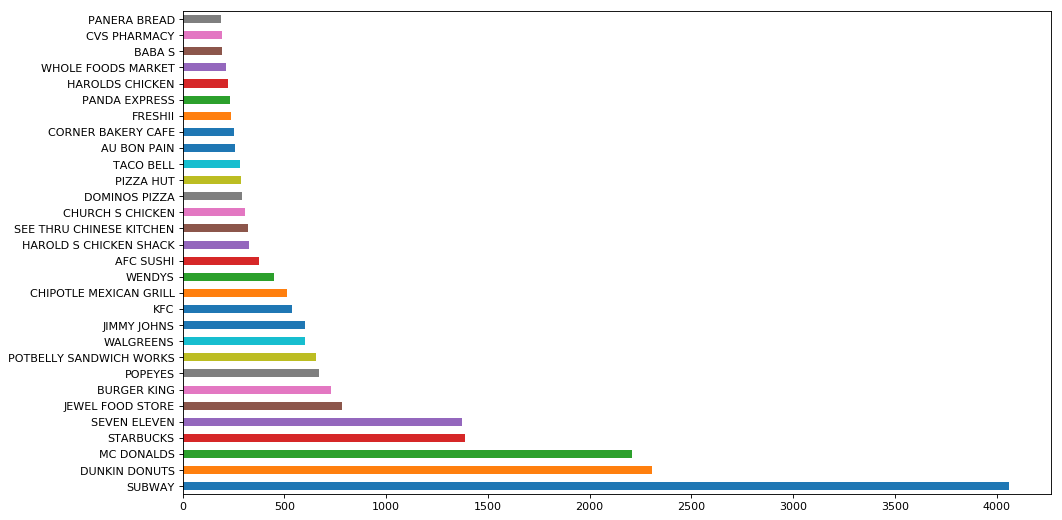

In [188]:
# Plot the 30 most appearning names
plt.figure(figsize=(14, 8), dpi = 80)
inspection_hist = inspection_data_eda['DBA Name'].value_counts().head(30).plot(kind='barh')

_We can see here that our plot represents well the most common food chains in Chicago. We could use this feature to rank big food chains by the food inspections results._

#### 1.3.3 : License \#  #

In [189]:
inspection_data_eda['License #'].value_counts().head(10)

0.0          486
1354323.0    192
14616.0      176
1574001.0     83
1974745.0     59
1142451.0     49
1884255.0     48
1490035.0     46
2083833.0     46
1596210.0     45
Name: License #, dtype: int64

_From here we can see that some businesses has 0.0 values with correspond to missing license._

_We can also see that many rows have the same license. This can be due either by many inspection of the same business or a business which has multiple restaurants._

In [190]:
inspection_data_eda[inspection_data_eda['License #'] == 1354323.0].head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
121531,1375473,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
121578,1375474,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
121588,1375471,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
121600,1375475,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
121616,1375470,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031


_We can see here that for this example, it is a problem of duplication for an inspection. Indeed, it is done at the same place, the same day, multiple times._

#### 1.3.4 : Facility Type

In [191]:
facility_type_counts = inspection_data_eda['Facility Type'].value_counts()

print("Number of types is : {n}".format(n = facility_type_counts.shape[0]))

facility_type_counts.head(30)

Number of types is : 476


Restaurant                         129888
Grocery Store                       24795
School                              11997
Children's Services Facility         3039
Bakery                               2820
Daycare (2 - 6 Years)                2666
Daycare Above and Under 2 Years      2371
Long Term Care                       1345
Catering                             1178
Liquor                                847
Mobile Food Dispenser                 783
Daycare Combo 1586                    741
Mobile Food Preparer                  590
Golden Diner                          558
Hospital                              538
Wholesale                             535
TAVERN                                280
Daycare (Under 2 Years)               253
Special Event                         208
Shared Kitchen User (Long Term)       170
BANQUET HALL                          122
GAS STATION                           120
Shared Kitchen                        109
Mobile Prepared Food Vendor       

_We can see her that the main type is Restaurant, from far. We also see that there is 479 different types inside this variable._

_As the number of rows per time decreases fast, we can create a new type called 'Other' that will aggregate all small type to end with 20 types._

In [192]:
top_facility_types = facility_type_counts.head(19).index.values

In [193]:
# Replace all small facility types by 'Other'
def compute_facility_type(type_name):
    if type_name in top_facility_types:
        return type_name
    else:
        return 'Other'

In [194]:
inspection_data_eda['Facility Type'] = inspection_data_eda['Facility Type'].map(lambda x : compute_facility_type(x))

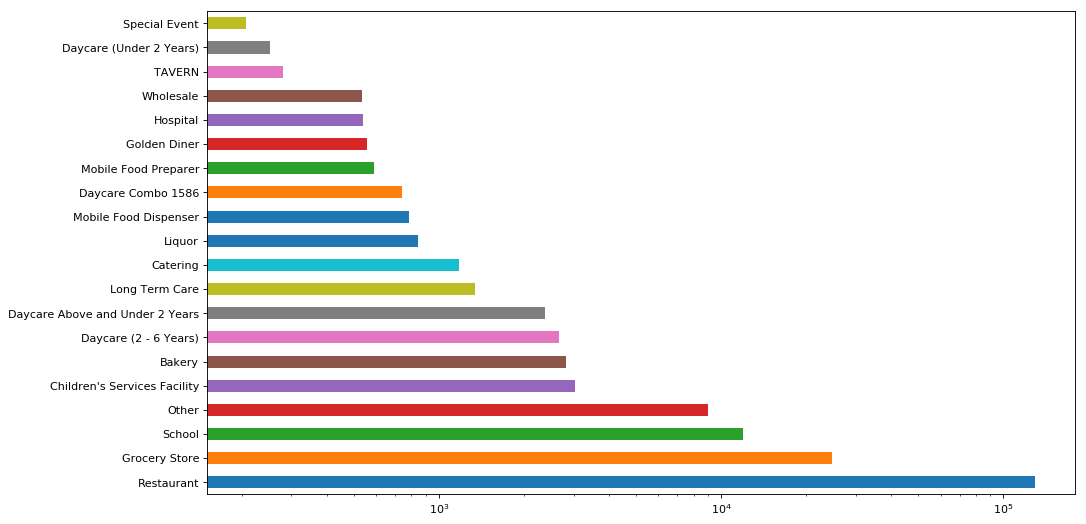

In [195]:
# Plot the 20 most appearning facility types
plt.figure(figsize=(14, 8), dpi = 80)
inspection_hist = inspection_data_eda['Facility Type'].value_counts().head(20).plot(kind='barh', logx=True)

_We have here a nice plot of the most appearing facility types for food in chicago. (Log scale !!)._

#### 1.3.5 : Risk

In [196]:
inspection_data_eda['Risk'].value_counts()

Risk 1 (High)      139602
Risk 2 (Medium)     37872
Risk 3 (Low)        16895
All                    30
Name: Risk, dtype: int64

_We could replace this feature by a numerical value. Indeed, we could apply the following mapping:_
- Risk 1 (High) : 3
- Risk 2 (Medium) : 2
- Risk 3 (Low) : 1
- All : 4

_This mapping would keep this order of magnitude of the diffent risks : All > High > Medium > Low_

In [197]:
def compute_numerical_risk(risk):
    if 'All' in risk:
        return 4
    elif 'High' in risk:
        return 3
    elif 'Medium' in risk:
        return 2
    else:
        return 1

In [198]:
inspection_data_eda['Risk'] = inspection_data_eda['Risk'].map(compute_numerical_risk)

#### 1.3.6 : Address

_This is a difficult data to analyse. Most of the values are diffent. We will look at it later._

#### 1.3.7 : Zip

_This is a difficult data to analyse. Most of the values are diffent. We will look at it later._

#### 1.3.8 : Inspection Date

_Something we can do with the date is to transform it into 3 Day, Month, and Year features. It will then be easier for us to analyse it._

In [199]:
inspection_data_eda['Inspection Date'].head()

0    2019-11-15T00:00:00.000
1    2019-11-15T00:00:00.000
2    2019-11-15T00:00:00.000
3    2019-11-15T00:00:00.000
4    2019-11-15T00:00:00.000
Name: Inspection Date, dtype: object

In [200]:
# Create all date features
inspection_data_eda['Year'] = inspection_data_eda['Inspection Date'].apply(lambda x : x.split('-')[0])
inspection_data_eda['Month'] = inspection_data_eda['Inspection Date'].apply(lambda x : x.split('-')[1])
inspection_data_eda['Day'] = inspection_data_eda['Inspection Date'].apply(lambda x : x.split('-')[2].split('T')[0])

# Remove useless inspection date feature 
del inspection_data_eda['Inspection Date']

In [201]:
def plot_date_elem(name):
    plt.figure(figsize=(14, 8), dpi = 80)
    inspections_per_x = inspection_data_eda[name].value_counts()
    inspections_per_x.index.values.sort()
    
    ax = inspections_per_x.plot(kind='barh', title='Number of inspections per {d}'.format(d=name))
    ax.set_xlabel('Number of inspection')
    ax.set_ylabel(name)
    plt.show()
    

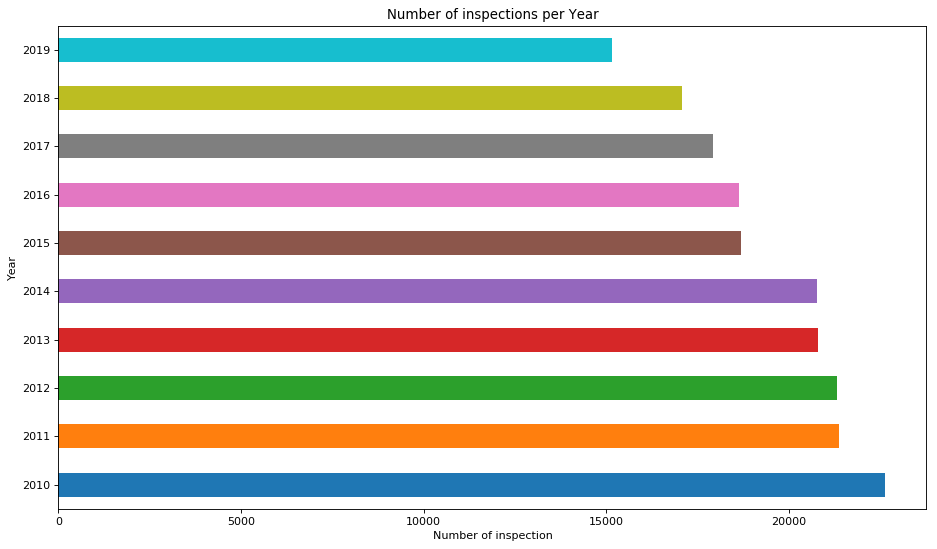

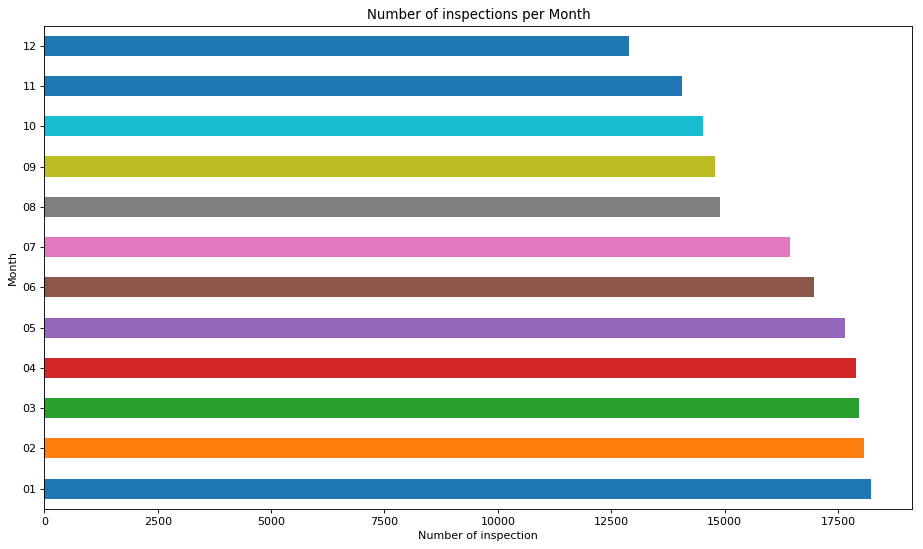

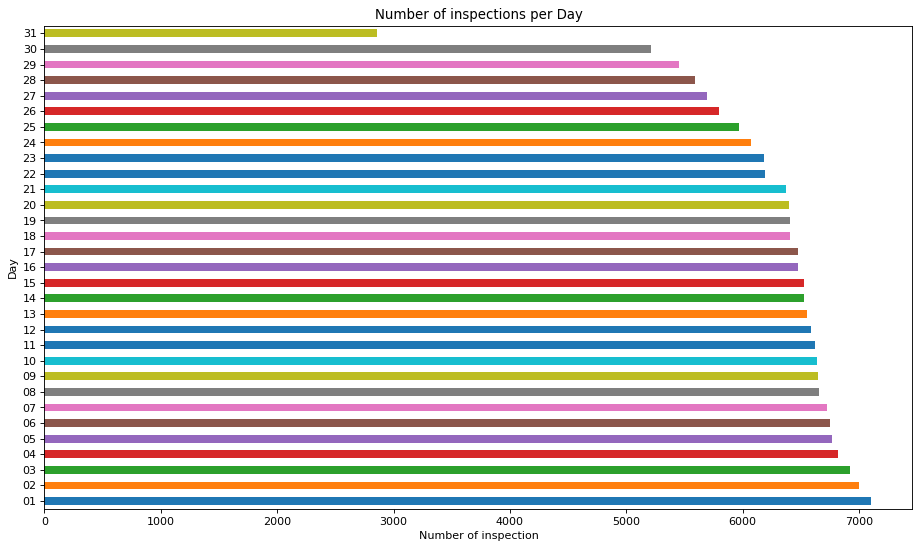

In [202]:
plot_date_elem('Year')
plot_date_elem('Month')
plot_date_elem('Day')

_This feature nows look much better and is easier to analyse._

#### 1.3.9 : Inspection Type


An inspection can be one of the following types: 
- canvass, the most common type of inspection performed at a frequency relative to the risk of the establishment; 
- consultation, when the inspection is done at the request of the owner prior to the opening of the establishment; 
- complaint, when the inspection is done in response to a complaint against the establishment; 
- license, when the inspection is done as a requirement for the establishment to receive its license to operate; 
- suspect food poisoning, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); 
- task-force inspection, when an inspection of a bar or tavern is done. 
- Re-inspections can occur for most types of these inspections and are indicated as such.


In [203]:
inspection_data_eda['Inspection Type'].value_counts().head(20)

Canvass                                   102673
License                                    25631
Canvass Re-Inspection                      20454
Complaint                                  18068
License Re-Inspection                       8899
Complaint Re-Inspection                     7538
Short Form Complaint                        6720
Suspected Food Poisoning                     845
Consultation                                 661
Tag Removal                                  602
License-Task Force                           598
Recent Inspection                            331
Out of Business                              283
Task Force Liquor 1475                       251
Suspected Food Poisoning Re-inspection       190
Complaint-Fire                               157
Short Form Fire-Complaint                    112
No Entry                                      60
Special Events (Festivals)                    59
Complaint-Fire Re-inspection                  44
Name: Inspection Typ

_We can see here that there are multiple types of inspection. The main ones are Canvass, and License. We can also see that the 'Re-Inspection' qualifier can be added._  

_For now, the are not going to handle the different types of inspection. We are simply going to create a new feature called 'Re-Inspection' that will be either 0 if it is not a Re-Inspection and 1 if it is._

In [204]:
# Check if an inspeciton is a Re-Inspection
def is_reinspection(inspection):
    inspection = inspection.upper()
    if 'RE-INSPECTION' in inspection:
        return 1
    return 0

In [205]:
# Make the letters to upper case and remove the Re-Inspection term
def parse_inspection(inspection):
    inspection = inspection.upper()
    inspection = inspection.replace('RE-INSPECTION', '')
    return inspection.strip()

In [206]:
# Create the feature Re-Inpsection and remove it from the Inspectino Type feature. 
inspection_data_eda['Re-Inspection'] = inspection_data_eda['Inspection Type'].map(is_reinspection)
inspection_data_eda['Inspection Type'] = inspection_data_eda['Inspection Type'].map(parse_inspection)

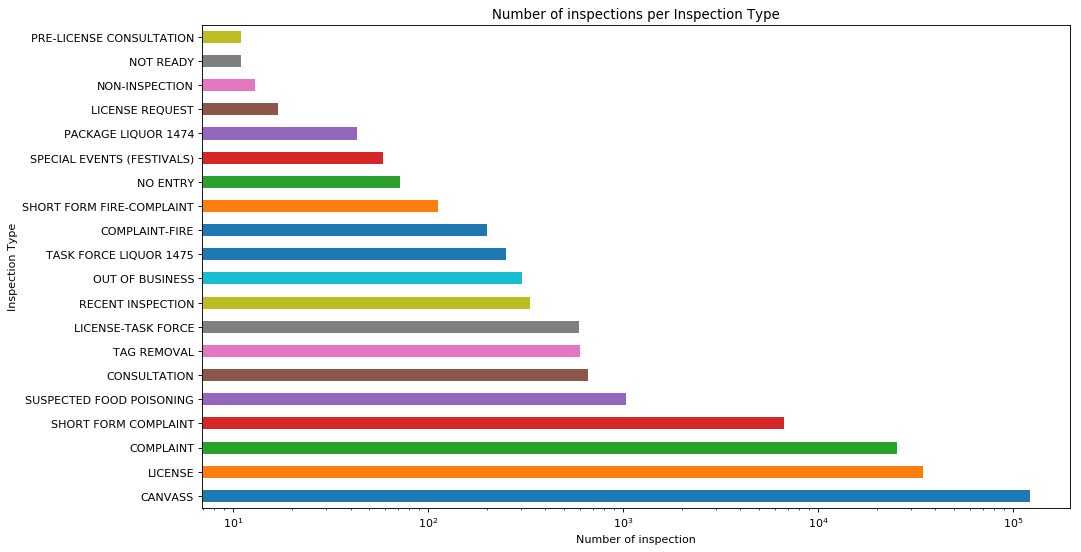

In [207]:
# Plot the 20 most common inspection type
most_common_inspections_count = inspection_data_eda['Inspection Type'].value_counts().head(20)
plt.figure(figsize=(14, 8), dpi = 80)
    
ax = most_common_inspections_count.plot(kind='barh', title='Number of inspections per Inspection Type', logx=True)
ax.set_xlabel('Number of inspection')
ax.set_ylabel('Inspection Type')
plt.show()

Text(0, 0.5, '')

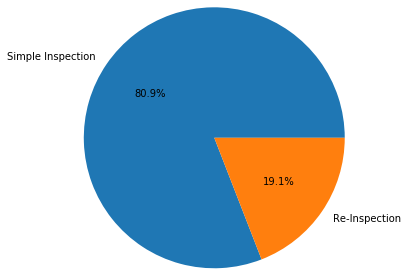

In [208]:
# Show the proportion of Re-Inspection for all inspections :
reinspection_count = inspection_data_eda['Re-Inspection'].value_counts()
ax = reinspection_count.plot(kind='pie', labels= ['Simple Inspection', 'Re-Inspection'], autopct='%1.1f%%',  radius=1.5)
ax.set_ylabel('')

#### 1.3.10 : Results

An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15-29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.

Text(0, 0.5, '')

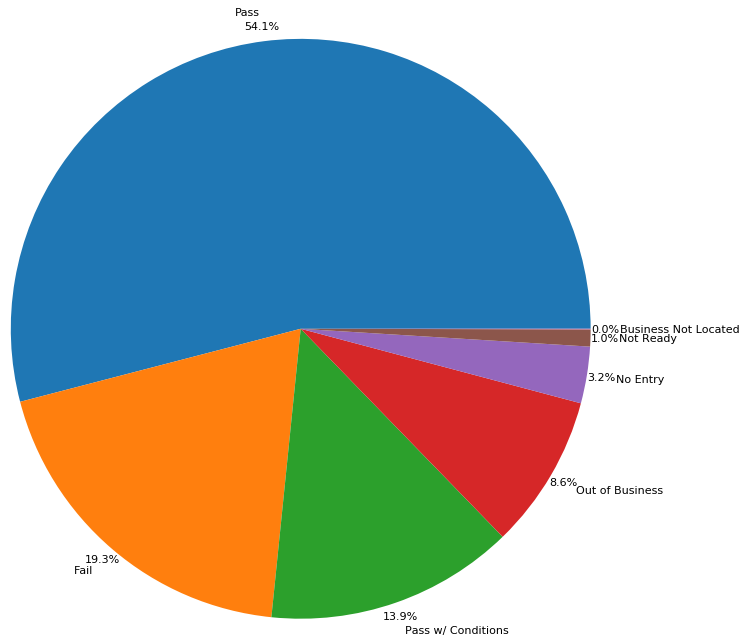

In [209]:
plt.figure(figsize=(14, 8), dpi = 80)
inspection_result_counts = inspection_data_eda['Results'].value_counts()
ax = inspection_result_counts.plot(kind='pie', labels= inspection_result_counts.index, autopct='%1.1f%%', pctdistance=1.05, radius=1.5)
ax.set_ylabel('')

_The data here looks really good, we are going to let it like that for now._

#### 1.3.11 : Violations

An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 

In [210]:
inspection_data_eda['Violations'].value_counts().head()

32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: VIOLATION STILL PENDING                                                                                                                                                                                                                                                                                                                                                                                                                                                             11
45. FOOD HANDLER REQUIREMENTS MET - Comments: ALL FOOD HANDLING EMPLOYEES MUST SHOW PROOF OF FOOD HANDLER TRAINING.  MUST PROVIDE.                                                                                                                                                                                                                                                                                                              

_We can distinguish a pattern of the data:_ 

- Violation : [Violation number]. [Violation description] - Comments : [Comment content]
- Separator between Violations : |

For now, we are going to ignore the comments because it is difficult to handle. We are going to : 
- Create a mapping between Violation number and Violation description
- Replace all the Violations features by a list of id corresponding to violations.

In [211]:
def compute_violations_mapping(all_violations):
    violations_mapping = {}
    
    for v in all_violations:
        listed_violations = extract_violation(v)
        for v2 in listed_violations:
            if v2[0] not in violations_mapping:
                violations_mapping[v2[0]] =  v2[1]
                
    return violations_mapping
        
        
        
def extract_violation(violation):
    
    result = []
    
    if (isinstance(violation, str)):
        violation_list = violation.split(' | ')
    
        for v in violation_list:
            violation_params = v.split(' - Comments: ')
            violation_id = int(violation_params[0].split('.')[0])
            violation_text = violation_params[0].replace(str(violation_id) + '. ', '')
            if len(violation_params) > 1:
                violation_comment = violation_params[1]
            else:
                violation_comment = ''
        
            result.append([violation_id, violation_text, violation_comment])
    
    
    
    return result
    
    

In [212]:
violations_mapping = compute_violations_mapping(inspection_data_eda['Violations'])
violations_data_type = pd.DataFrame.from_dict(violations_mapping, orient='index', columns=['Violation Description'])
violations_data_type = violations_data_type.sort_index()

In [213]:
violations_data_type.head()

,Violation Description
1,"PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLED..."
2,CITY OF CHICAGO FOOD SERVICE SANITATION CERTIF...
3,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPL..."
4,PROPER USE OF RESTRICTION AND EXCLUSION
5,PROCEDURES FOR RESPONDING TO VOMITING AND DIAR...


_Now we have a nice registery of all possibles Violations, we can therefore now store only the Violations ids._

In [214]:
def compute_new_violations_lists(violation):
    result = []
    if (isinstance(violation, str)):
        elements = extract_violation(violation)
        for e in elements:
            result.append(e[0])
    return result

In [215]:
inspection_data_eda['Violations'] = inspection_data_eda['Violations'].map(compute_new_violations_lists)

In [216]:
inspection_data_eda['Violations'].head(10)

0                                         [53, 54, 56]
1                                                  [3]
2                                                   []
3                                             [47, 58]
4                                             [47, 49]
5                                               [3, 5]
6                                                   []
7    [1, 2, 3, 5, 9, 36, 37, 38, 41, 47, 51, 53, 55...
8                                          [5, 55, 56]
9                         [10, 25, 47, 48, 55, 56, 57]
Name: Violations, dtype: object

_Now, our violations list are represented in a more elegant was and are simpler. We set the null values to empty lists._

_Let's count the number of time a violation were signaled:_

In [217]:
# Create a dictionary that the counts per violation type.
def build_inspection_count(all_inspections):
    count = {}
    for inspection_list in all_inspections:
        for inspection_id in inspection_list:
            if inspection_id not in count:
                count[inspection_id] = 1
            else:
                count[inspection_id] += 1
    return count;

In [218]:
inspection_count = build_inspection_count(inspection_data_eda['Violations'])

In [219]:
inspection_count_data = pd.DataFrame.from_dict(inspection_count, orient='index', columns=['Count per Violation'])
inspection_count_data = inspection_count_data.sort_index()

<Figure size 1120x640 with 0 Axes>

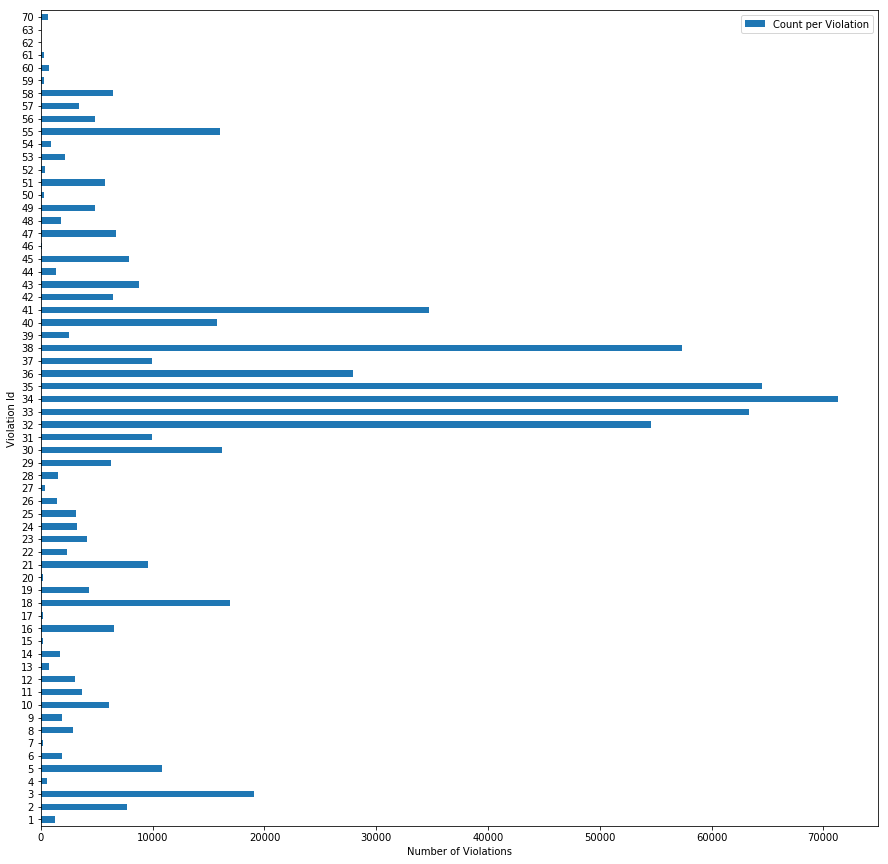

In [220]:
plt.figure(figsize=(14, 8), dpi = 80)
ax = inspection_count_data.plot(kind='barh', figsize=(15, 15))
ax.set_xlabel('Number of Violations')
ax.set_ylabel('Violation Id')
plt.show()

#### 1.3.12 : Latitude, Longitude

_With the latitude and longitude, we can plot the map of inspections in Chicago during the last 10 years._


Our map should fit well with the Chicago city map :_

![image](https://previews.123rf.com/images/lesniewski/lesniewski1411/lesniewski141100002/33253618-chicago-neighborhood-map.jpg)

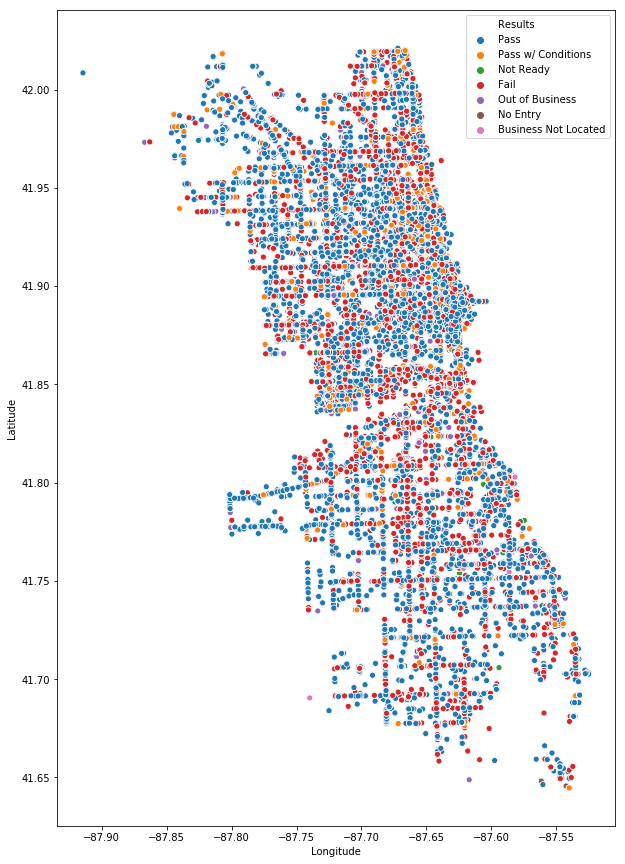

In [223]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', hue='Results' ,data=inspection_data_eda )

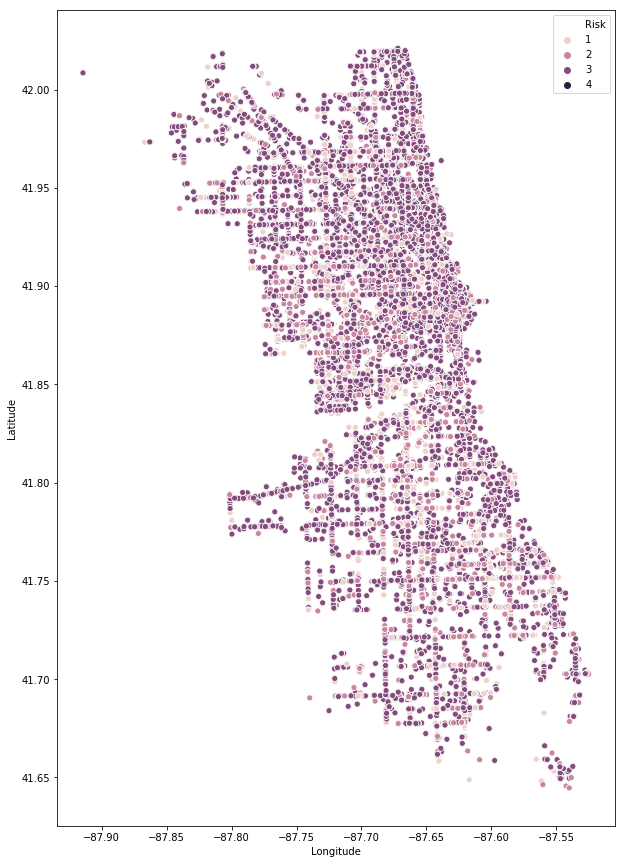

In [224]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', hue='Risk' ,data=inspection_data_eda )